HERE THE AUTOREJECT TREATED SEACRH GRID DATA IS HANDLED

In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots, plot_dist_hist

First Analysis of how quasi thresholding does on its own

In [2]:
baseline_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"baseline_results.npy")
baseline_alternate_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"baseline_results_alternate.npy")

In [3]:
baseline_results = np.load(baseline_folder)

In [4]:
baseline_results_alternate = np.load(baseline_alternate_folder)

In [5]:
epi_ar_ec_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"epi_data\auto_reject\0")
epi_ar_eo_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"epi_data\auto_reject\1")

In [6]:
epi_ar_ec_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [7]:
epi_ar_eo_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [8]:
for i, pth in enumerate(epi_ar_ec_folder.iterdir()):
    current = np.load(pth)
    epi_ar_ec_results[i, :, :, :] = current.copy()[1:, :, :]

In [9]:
for i, pth in enumerate(epi_ar_eo_folder.iterdir()):
    current = np.load(pth)
    epi_ar_eo_results[i, :, :, :] = current.copy()[1:, :, :]

In [10]:
epi_ar_results = epi_ar_ec_results.__add__(epi_ar_eo_results)/2

In [11]:
wang_ar_ec_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"yulin_wang\auto_reject\0")
wang_ar_eo_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"yulin_wang\auto_reject\1")

In [12]:
wang_ar_ec_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [13]:
wang_ar_eo_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [14]:
for i, pth in enumerate(wang_ar_ec_folder.iterdir()):
    current = np.load(pth)
    wang_ar_ec_results[i, :, :, :] = current.copy()[1:, :, :]

In [15]:
for i, pth in enumerate(wang_ar_eo_folder.iterdir()):
    current = np.load(pth)
    wang_ar_eo_results[i, :, :, :] = current.copy()[1:, :, :]

In [16]:
wang_ar_results = wang_ar_ec_results.__add__(wang_ar_eo_results)/2

In [17]:
srm_ar_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"srm_data\auto_reject")

In [18]:
srm_ar_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [19]:
for i, pth in enumerate(srm_ar_folder.iterdir()):
    current = np.load(pth)
    srm_ar_results[i, :, :, :] = current.copy()[1:, :, :]

In [22]:
spis_ar_folder = pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"SPIS-Resting-State-Dataset\auto_reject"

In [23]:
spis_ar_alternate_results = np.zeros(
    (   
        8,
        8,
        2,
        5
    )
)

In [24]:
count=0
for i, pth in enumerate(spis_ar_folder.iterdir()):
    current = np.load(pth)
    spis_ar_alternate_results[count, :] += current.copy()
    if i%2 != 0:
        count+=1

In [25]:
spis_ar_alternate_results /= 2

In [26]:
spis_ar_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [27]:
for i, pth in enumerate(spis_ar_folder.iterdir()):
    current = np.load(pth)
    spis_ar_results[i, :, :, :] = current.copy()

In [28]:
ar_results = np.zeros(
    (   
        64,
        8,
        2,
        5
    )
)

In [29]:
ar_results_alternate = np.zeros(
    (   
        56,
        8,
        2,
        5
    )
)

In [30]:
ar_results[0:16, :, :, :] = epi_ar_results
ar_results[16:32, :, :, :] = srm_ar_results
ar_results[32:48, :, :, :] = spis_ar_results
ar_results[48:64, :, :, :] = wang_ar_results

In [31]:
ar_results_alternate[0:16, :] = epi_ar_results
ar_results_alternate[16:32, :] = srm_ar_results
ar_results_alternate[32:40, :] = spis_ar_alternate_results
ar_results_alternate[40:56, :] = wang_ar_results

In [32]:
ar_results[:, :, :, 2] -= ar_results[:, :, :, 1]

In [33]:
ar_results_alternate[:, :, :, 2] -= ar_results_alternate[:, :, :, 1]

ARTICLE PLOTS

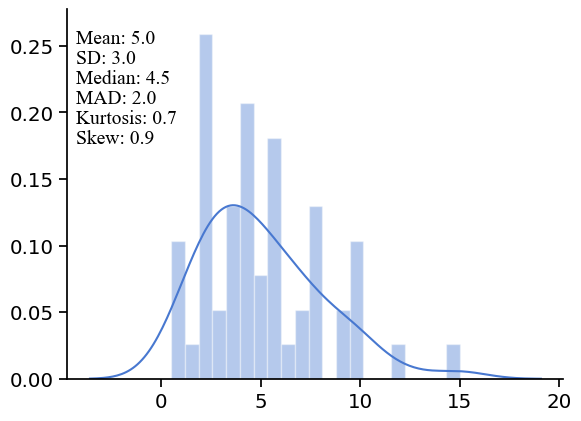

In [34]:
plot_dist_hist(ar_results_alternate[:, 2, 1, 1]+baseline_results_alternate[:, 1])
plt.savefig(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"grid_brain_autoreject")

In [35]:
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1\autorej", ar_results_alternate[:, 2, 1, 1]+baseline_results_alternate[:, 1])
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1\autorej_ex", ar_results_alternate[:, 2, 1, 0])

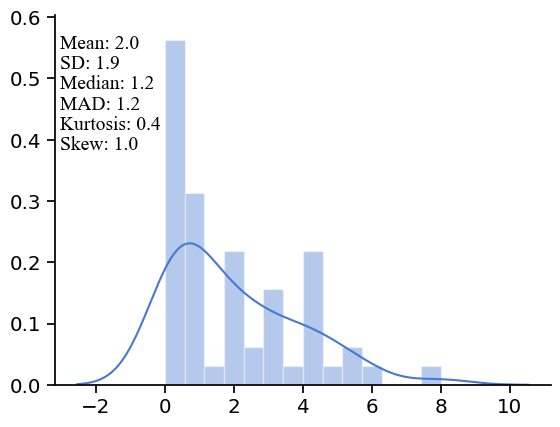

In [36]:
plot_dist_hist(ar_results_alternate[:, 3, 0, 2]+baseline_results_alternate[:, 2])
plt.savefig(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"grid_artefact_autoreject")

In [37]:
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1_art\autorej", ar_results_alternate[:, 3, 0, 2]+baseline_results_alternate[:, 2])
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1_art\autorej_ex", ar_results_alternate[:, 3, 0, 0])

OPTIMAL PARAMETERS

In [38]:
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 0], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 1], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 2], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 3], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 4], 0)), (5, 2)))

(0, 1)
(2, 1)
(3, 0)
(2, 1)
(3, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

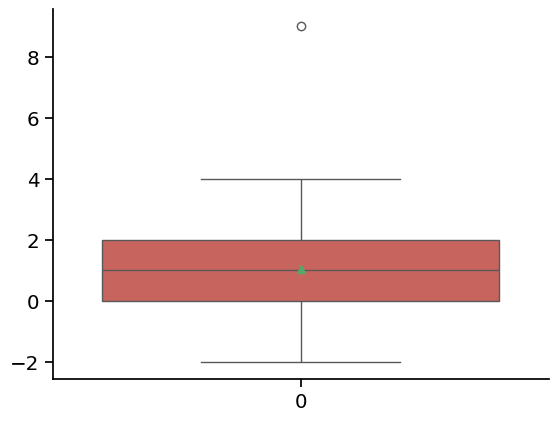

In [39]:
plot_n_boxplots([ar_results[:, 2, 1, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

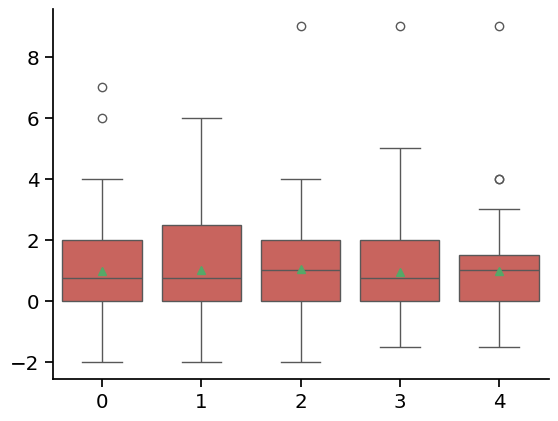

In [40]:
plot_n_boxplots([ar_results[:, 0, 1, 1].flatten(), ar_results[:, 1, 1, 1].flatten(), ar_results[:, 2, 1, 1].flatten(), ar_results[:, 3, 1, 1].flatten(), ar_results[:, 4, 1, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to not av_ref

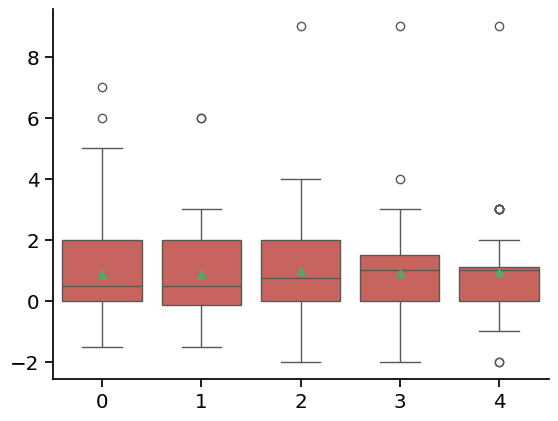

In [41]:
plot_n_boxplots([ar_results[:, 0, 0, 1].flatten(), ar_results[:, 1, 0, 1].flatten(), ar_results[:, 2, 0, 1].flatten(), ar_results[:, 3, 0, 1].flatten(), ar_results[:, 4, 0, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Investigating the statisitcs of itteration maximazing the average number of biological components.

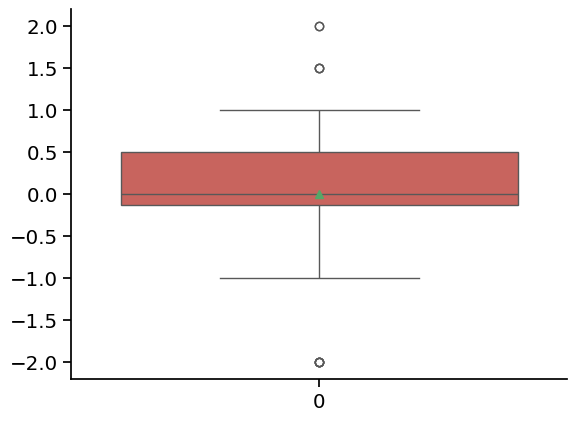

In [42]:
plot_n_boxplots([ar_results[:, 3, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\plotting\templates.py:111: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


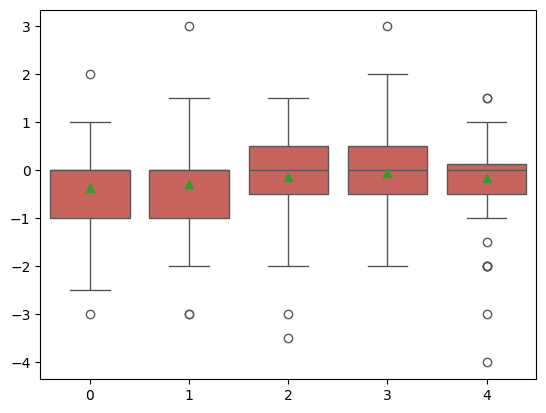

In [77]:
plot_n_boxplots([ar_results[:, 0, 0, 2].flatten(), ar_results[:, 1, 0, 2].flatten(), ar_results[:, 2, 0, 2].flatten(), ar_results[:, 3, 0, 2].flatten(), ar_results[:, 4, 0, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to av_ref

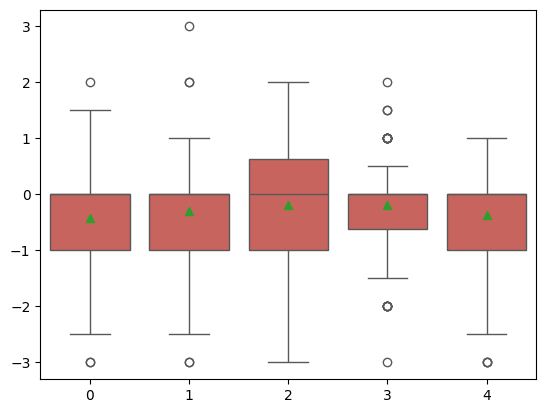

In [78]:
plot_n_boxplots([ar_results[:, 0, 1, 2].flatten(), ar_results[:, 1, 1, 2].flatten(), ar_results[:, 2, 1, 2].flatten(), ar_results[:, 3, 1, 2].flatten(), ar_results[:, 4, 1, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])